In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(-53.63407690525719, 89.01804198576872),
 (-3.1686484426733017, -166.51726746616558),
 (48.91644052262117, 153.19524094473542),
 (-4.1983741562734735, 108.32958018331283),
 (17.947864092880423, -5.1951321707782085),
 (42.73850791948922, 64.80805986165726),
 (-35.460298002592154, -109.24032841299567),
 (67.6715189020432, 6.22419536053755),
 (51.69853883611859, 124.00426473675009),
 (-37.12371193810217, -130.26937757698028),
 (-65.31447898809856, 97.69998775354912),
 (41.86420498046513, -97.14538847449374),
 (19.042247582420018, -167.19563105509226),
 (48.48249485731142, 149.08861171818893),
 (3.8162675771941394, -98.64048011998773),
 (65.7667436167458, -165.90114067082447),
 (44.908619824492206, 127.17994635775801),
 (-59.503768175033926, 151.78107944918628),
 (-48.6372948495447, -85.88420229057442),
 (65.85849075073898, 76.66042208651805),
 (16.60427160965095, 42.52258734078907),
 (85.9062015320315, 144.51305732543176),
 (-87.5128119802041, -54.741092983076385),
 (-10.060978332560083,

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = lat_lngs

In [7]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for value in coordinates:
    city = citipy.nearest_city(value[0],value[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | manggar
Processing Record 5 of Set 1 | araouane
Processing Record 6 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | sistranda
Processing Record 9 of Set 1 | tahe
Processing Record 10 of Set 1 | norfolk
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | vostok
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | wuchang
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | novyy urengoy
Processing Record 19 of Set 1 | jizan
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | atuo

City not found. Skipping...
Processing Record 38 of Set 4 | nishihara
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | yerbogachen
Processing Record 41 of Set 4 | carnot
Processing Record 42 of Set 4 | hami
Processing Record 43 of Set 4 | bowen
Processing Record 44 of Set 4 | jaen
Processing Record 45 of Set 4 | katangli
Processing Record 46 of Set 4 | general pico
Processing Record 47 of Set 4 | eckernforde
Processing Record 48 of Set 4 | chikwawa
Processing Record 49 of Set 4 | sokolo
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | labutta
City not found. Skipping...
Processing Record 4 of Set 5 | temaraia
City not found. Skipping...
Processing Record 5 of Set 5 | weihai
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | sioux lookout
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | cartagena
Processing Record 10 of 

Processing Record 23 of Set 8 | sao joao da barra
Processing Record 24 of Set 8 | teknaf
Processing Record 25 of Set 8 | cortez
Processing Record 26 of Set 8 | santiago del estero
Processing Record 27 of Set 8 | ahuimanu
Processing Record 28 of Set 8 | kautokeino
Processing Record 29 of Set 8 | prescott
Processing Record 30 of Set 8 | xam nua
Processing Record 31 of Set 8 | raahe
Processing Record 32 of Set 8 | karacakoy
Processing Record 33 of Set 8 | bengkulu
Processing Record 34 of Set 8 | berlevag
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | darnah
Processing Record 37 of Set 8 | tunxi
City not found. Skipping...
Processing Record 38 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 39 of Set 8 | saint-francois
Processing Record 40 of Set 8 | zhigansk
Processing Record 41 of Set 8 | srednekolymsk
Processing Record 42 of Set 8 | fort nelson
Processing Record 43 of Set 8 | itaocara
Processing Record 44 of Set 8 | luwuk
Processing Record 4

Processing Record 12 of Set 12 | pilar
Processing Record 13 of Set 12 | chipinge
Processing Record 14 of Set 12 | kununurra
Processing Record 15 of Set 12 | vicente guerrero
Processing Record 16 of Set 12 | biltine
Processing Record 17 of Set 12 | tombouctou
Processing Record 18 of Set 12 | fonte boa
Processing Record 19 of Set 12 | martapura
Processing Record 20 of Set 12 | novi sanzhary
Processing Record 21 of Set 12 | andenes
Processing Record 22 of Set 12 | tucuman
Processing Record 23 of Set 12 | micheweni
Processing Record 24 of Set 12 | constitucion
Processing Record 25 of Set 12 | boma
Processing Record 26 of Set 12 | poum
Processing Record 27 of Set 12 | skiros
City not found. Skipping...
Processing Record 28 of Set 12 | makhinjauri
Processing Record 29 of Set 12 | boyolangu
Processing Record 30 of Set 12 | torbat-e jam
Processing Record 31 of Set 12 | loukhi
Processing Record 32 of Set 12 | new glasgow
Processing Record 33 of Set 12 | palabuhanratu
City not found. Skipping...

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,65.05,55,99,8.55,AU,2021-10-15 01:34:30
1,Severo-Kurilsk,50.6789,156.1250,46.89,98,100,7.36,RU,2021-10-15 01:34:30
2,Manggar,-2.8833,108.2667,85.51,70,97,9.60,ID,2021-10-15 01:34:31
3,Araouane,18.9048,-3.5265,81.48,10,8,11.10,ML,2021-10-15 01:34:31
4,Rikitea,-23.1203,-134.9692,74.91,72,70,4.03,PF,2021-10-15 01:34:32
5,Sistranda,63.7256,8.8340,46.36,66,100,28.10,NO,2021-10-15 01:34:32
6,Tahe,52.3333,124.7333,24.15,51,100,6.67,CN,2021-10-15 01:34:33
7,Norfolk,42.1668,-71.2495,66.92,89,1,0.00,US,2021-10-15 01:34:33
8,Kapaa,22.0752,-159.3190,84.18,75,75,5.01,US,2021-10-15 01:34:33
9,Vostok,46.4856,135.8833,31.41,75,100,8.37,RU,2021-10-15 01:34:34


In [10]:
column_reorder = ["City","Country","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]


In [11]:
city_data_df = city_data_df[column_reorder]
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,-33.6500,115.3333,65.05,55,99,8.55
1,Severo-Kurilsk,RU,50.6789,156.1250,46.89,98,100,7.36
2,Manggar,ID,-2.8833,108.2667,85.51,70,97,9.60
3,Araouane,ML,18.9048,-3.5265,81.48,10,8,11.10
4,Rikitea,PF,-23.1203,-134.9692,74.91,72,70,4.03
...,...,...,...,...,...,...,...,...
563,Itaituba,BR,-4.2761,-55.9836,84.04,46,93,3.06
564,Gazojak,TM,41.1875,61.4036,48.88,31,4,9.82
565,Quimperle,FR,47.8667,-3.5500,53.94,93,0,3.44
566,Camargo,MX,27.6667,-105.1667,73.62,31,0,7.63


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

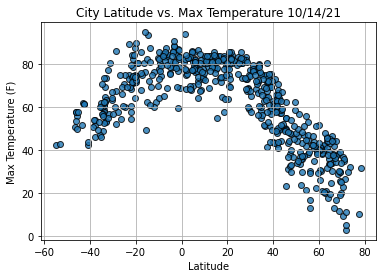

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

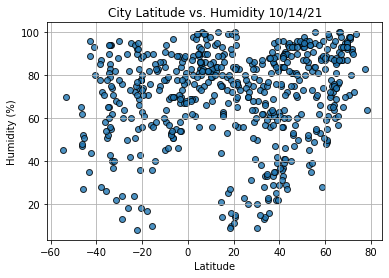

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

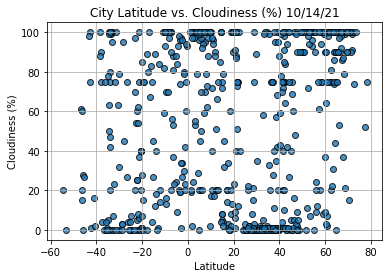

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


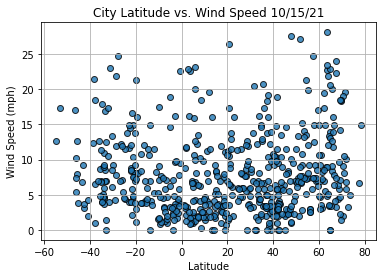

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress
    
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City            Hobart
Country             AU
Lat           -42.8794
Lng           147.3294
Max Temp         62.02
Humidity            96
Cloudiness          75
Wind Speed        9.22
Name: 13, dtype: object

In [45]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Severo-Kurilsk,RU,50.6789,156.1250,46.89,98,100,7.36
3,Araouane,ML,18.9048,-3.5265,81.48,10,8,11.10
5,Sistranda,NO,63.7256,8.8340,46.36,66,100,28.10
6,Tahe,CN,52.3333,124.7333,24.15,51,100,6.67
7,Norfolk,US,42.1668,-71.2495,66.92,89,1,0.00
...,...,...,...,...,...,...,...,...
561,Boddam,GB,57.4667,-1.7833,46.71,62,61,24.67
564,Gazojak,TM,41.1875,61.4036,48.88,31,4,9.82
565,Quimperle,FR,47.8667,-3.5500,53.94,93,0,3.44
566,Camargo,MX,27.6667,-105.1667,73.62,31,0,7.63


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

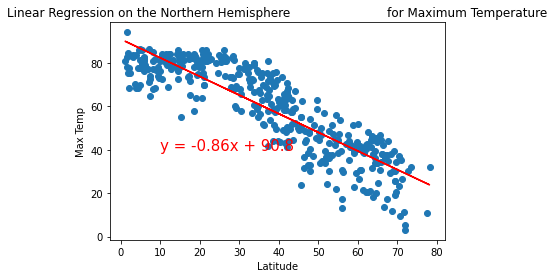

In [53]:
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

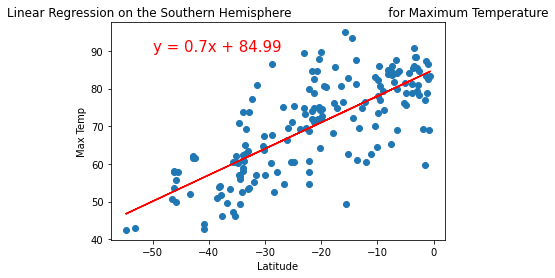

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

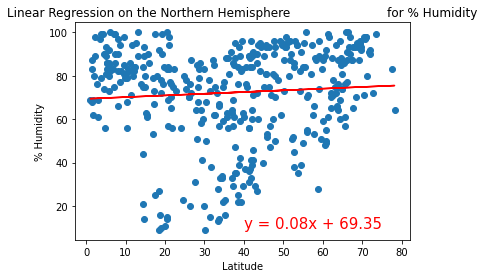

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

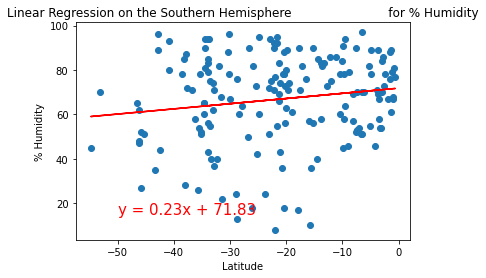

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

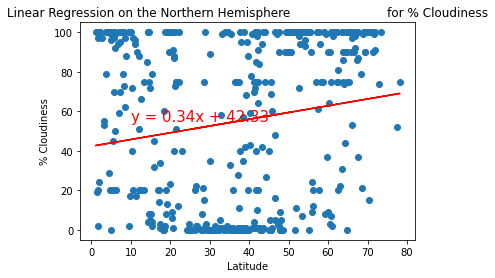

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

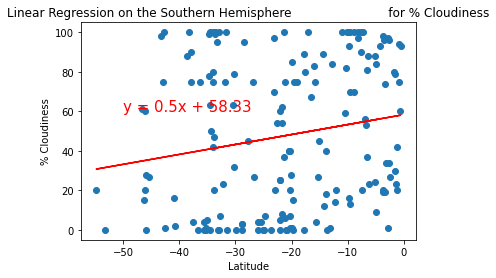

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))